In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

In [2]:
df = pd.read_csv('Boston_Housing.csv')
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Set MEDV as Y
Y = df['MEDV']

# Set LSTAT as X
X = pd.DataFrame(df['LSTAT'])

In [4]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# Get p-values for the coefficients
# Get standard error for the coefficients
# Used this: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
from scipy import stats 

params = np.append(reg.intercept_,reg.coef_)
predictions = reg.predict(X)


newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = sum((Y-predictions)**2) / ( len(newX) - len(newX.columns) )

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]

col_map = {0 : 'Intercept'}

for i, col in enumerate(X.columns):
    col_map[i + 1] = col

myDF3.index = myDF3.index.map(col_map)

print(myDF3)

           Coefficients  Standard Errors  t values  Probabilites
Intercept       34.5538            0.563    61.415           0.0
LSTAT           -0.9500            0.039   -24.528           0.0


In [10]:
import linear_model_stats as lms

rse = lms.rse_arr(reg.predict(X), Y.values)


6.215760405398068

In [34]:
# Not needed ?

# R^2 statistic for the model
# from sklearn.metrics import r2_score

# r2_score(predictions, Y)

In [35]:
# F-statistic for the model

In [9]:
# Get intercept and coefficent
print('intercept:\t', reg.intercept_)
print('coefficent:\t', reg.coef_)
print('r squared:\t', reg.score(X, Y))

intercept:	 34.55384087938311
coefficent:	 [-0.95004935]
r squared:	 0.5441462975864799


In [10]:
# Get confidence intervals

In [11]:
lstat_line = np.linspace(0, 40, 100)
medv_line = reg.predict(lstat_line.reshape(lstat_line.size, 1))

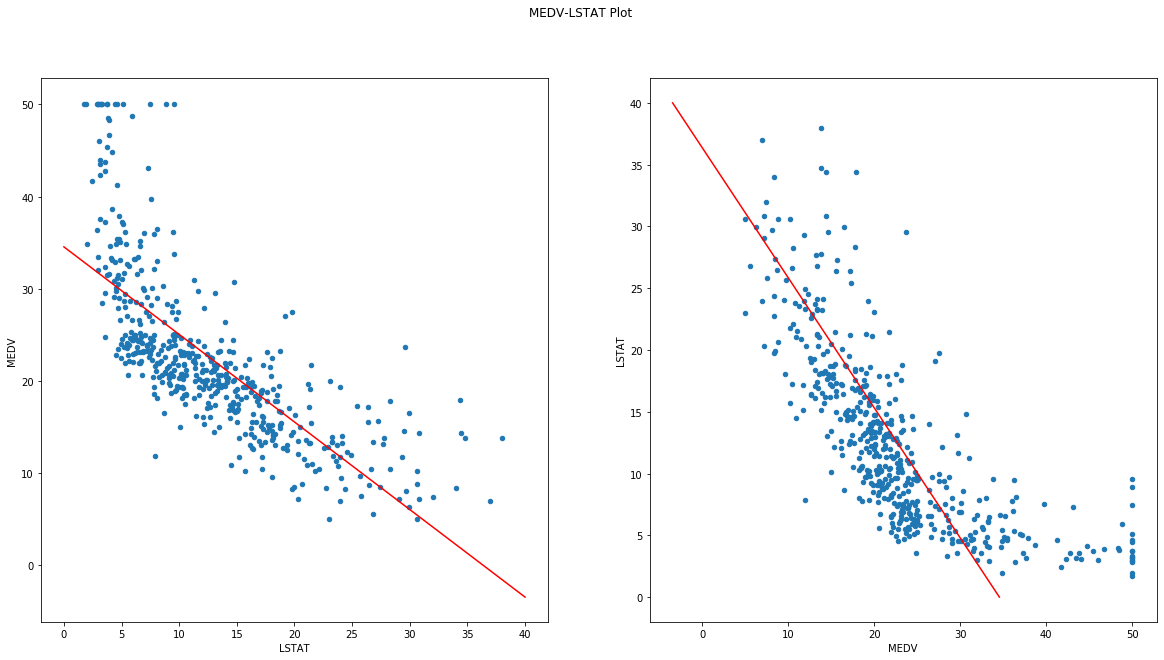

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 10)
fig.suptitle('MEDV-LSTAT Plot')

ax1.plot(lstat_line, medv_line, color='red')
df.plot.scatter(x='LSTAT', y='MEDV', ax=ax1)

ax2.plot(medv_line, lstat_line, color='red')
df.plot.scatter(x='MEDV', y='LSTAT', ax=ax2)

In [13]:
# Plot residuals / R diagnostic plots

Multiple Linear Regression

In [14]:
# Set MEDV as Y
Y = df['MEDV']

# Set LSTAT and AGE as X
X = pd.DataFrame(df[['LSTAT', 'AGE']])

In [15]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Get p-values for the coefficients
# Get standard error for the coefficients
# Used this: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
from scipy import stats 

params = np.append(reg.intercept_,reg.coef_)
predictions = reg.predict(X)


newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((Y-predictions)**2))/(len(newX)-len(newX.columns))


var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]

col_map = {0 : 'Intercept'}

for i, col in enumerate(X.columns):
    col_map[i + 1] = col

myDF3.index = myDF3.index.map(col_map)

print(myDF3)

           Coefficients  Standard Errors  t values  Probabilites
Intercept       33.2228            0.731    45.458         0.000
LSTAT           -1.0321            0.048   -21.416         0.000
AGE              0.0345            0.012     2.826         0.005


In [17]:
# F-statistic for the model

In [18]:
# Get intercept and coefficent
print('intercept:\t', reg.intercept_)
print('coefficent:\t', reg.coef_)
print('r squared:\t', reg.score(X, Y))

intercept:	 33.2227605317929
coefficent:	 [-1.03206856  0.03454434]
r squared:	 0.5512689379421003


Multiple linear regression on all columns

In [19]:
# Set MEDV as Y
Y = df['MEDV']

# Set LSTAT and AGE as X
X = df.drop('MEDV', axis=1)

In [20]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Get p-values for the coefficients
# Get standard error for the coefficients
# Used this: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
from scipy import stats 

params = np.append(reg.intercept_,reg.coef_)
predictions = reg.predict(X)


newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((Y-predictions)**2))/(len(newX)-len(newX.columns))


var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]

col_map = {0 : 'Intercept'}

for i, col in enumerate(X.columns):
    col_map[i + 1] = col

myDF3.index = myDF3.index.map(col_map)

print(myDF3)

           Coefficients  Standard Errors  t values  Probabilites
Intercept       36.4595            5.103     7.144         0.000
CRIM            -0.1080            0.033    -3.287         0.001
ZN               0.0464            0.014     3.382         0.001
INDUS            0.0206            0.061     0.334         0.738
CHAS             2.6867            0.862     3.118         0.002
NOX            -17.7666            3.820    -4.651         0.000
RM               3.8099            0.418     9.116         0.000
AGE              0.0007            0.013     0.052         0.958
DIS             -1.4756            0.199    -7.398         0.000
RAD              0.3060            0.066     4.613         0.000
TAX             -0.0123            0.004    -3.280         0.001
PTRATIO         -0.9527            0.131    -7.283         0.000
B                0.0093            0.003     3.467         0.001
LSTAT           -0.5248            0.051   -10.347         0.000


In [23]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [22]:
newX

,Constant,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,1.0,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,1.0,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,1.0,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,1.0,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,1.0,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [49]:
# To redo everything without age just create a new X dropping MEDV and AGE

In [50]:
# F-statistic for the model

Run a model with LSTAT, AGE, and LSTAT * AGE

In [54]:
# Set MEDV as Y
Y = df['MEDV']

# Set LSTAT and AGE as X
X = pd.DataFrame(df[['LSTAT', 'AGE']])
X['LSTAT*AGE'] = X['LSTAT'] * X['AGE']

In [56]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# Get p-values for the coefficients
# Get standard error for the coefficients
# Used this: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
from scipy import stats 

params = np.append(reg.intercept_,reg.coef_)
predictions = reg.predict(X)


newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((Y-predictions)**2))/(len(newX)-len(newX.columns))


var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]

col_map = dict()
col_map[0] = 'Intercept'

for i, col in enumerate(X.columns):
    col_map[i + 1] = col

myDF3.index = myDF3.index.map(col_map)

print(myDF3)

           Coefficients  Standard Errors  t values  Probabilites
Intercept       36.0885            1.470    24.553         0.000
LSTAT           -1.3921            0.167    -8.313         0.000
AGE             -0.0007            0.020    -0.036         0.971
LSTAT*AGE        0.0042            0.002     2.244         0.025


Run a model with LSTAT and LSTAT^2

In [65]:
# Set MEDV as Y
Y = df['MEDV']

# Set LSTAT and AGE as X
X = pd.DataFrame(df[['LSTAT']])
X['LSTAT^2'] = np.power(X['LSTAT'], 2)

In [66]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# Get p-values for the coefficients
# Get standard error for the coefficients
# Used this: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
from scipy import stats 

params = np.append(reg.intercept_,reg.coef_)
predictions = reg.predict(X)


newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((Y-predictions)**2))/(len(newX)-len(newX.columns))


var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]

col_map = dict()
col_map[0] = 'Intercept'

for i, col in enumerate(X.columns):
    col_map[i + 1] = col

myDF3.index = myDF3.index.map(col_map)

print(myDF3)

           Coefficients  Standard Errors  t values  Probabilites
Intercept       42.8620            0.872    49.149           0.0
LSTAT           -2.3328            0.124   -18.843           0.0
LSTAT^2          0.0435            0.004    11.628           0.0


In [69]:
# Run ANOVA

In [70]:
# Plot residuals

Run a model with LSTAT to the 5th degree

In [78]:
# Set MEDV as Y
Y = df['MEDV']

# Set LSTAT and AGE as X
X = pd.DataFrame(df[['LSTAT']])
LSTAT_col_format = 'LSTAT^{power}'

power = 5
for i in range(2, power + 1):
    col_name = LSTAT_col_format.format(power = i)
    X[col_name] = np.power(X['LSTAT'], i)

In [80]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# Get p-values for the coefficients
# Get standard error for the coefficients
# Used this: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
from scipy import stats 

params = np.append(reg.intercept_,reg.coef_)
predictions = reg.predict(X)


newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((Y-predictions)**2))/(len(newX)-len(newX.columns))


var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]

col_map = dict()
col_map[0] = 'Intercept'

for i, col in enumerate(X.columns):
    col_map[i + 1] = col

myDF3.index = myDF3.index.map(col_map)

print(myDF3)

           Coefficients  Standard Errors  t values  Probabilites
Intercept       67.6997            3.604    18.783           0.0
LSTAT          -11.9911            1.526    -7.859           0.0
LSTAT^2          1.2728            0.223     5.703           0.0
LSTAT^3         -0.0683            0.014    -4.747           0.0
LSTAT^4          0.0017            0.000     4.143           0.0
LSTAT^5         -0.0000            0.000    -3.692           0.0


Run a model with LSTAT and log(LSTAT)

In [82]:
# Set MEDV as Y
Y = df['MEDV']

# Set LSTAT and AGE as X
X = pd.DataFrame(df[['LSTAT']])
X['LOG_LSTAT'] = np.log(X['LSTAT'])

In [83]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
# Get p-values for the coefficients
# Get standard error for the coefficients
# Used this: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
from scipy import stats 

params = np.append(reg.intercept_,reg.coef_)
predictions = reg.predict(X)


newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((Y-predictions)**2))/(len(newX)-len(newX.columns))


var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]

col_map = dict()
col_map[0] = 'Intercept'

for i, col in enumerate(X.columns):
    col_map[i + 1] = col

myDF3.index = myDF3.index.map(col_map)

print(myDF3)

           Coefficients  Standard Errors  t values  Probabilites
Intercept       57.4306            1.681    34.162           0.0
LSTAT            0.3804            0.099     3.830           0.0
LOG_LSTAT      -16.7491            1.180   -14.188           0.0


TypeError: plot got an unexpected keyword argument 'x'

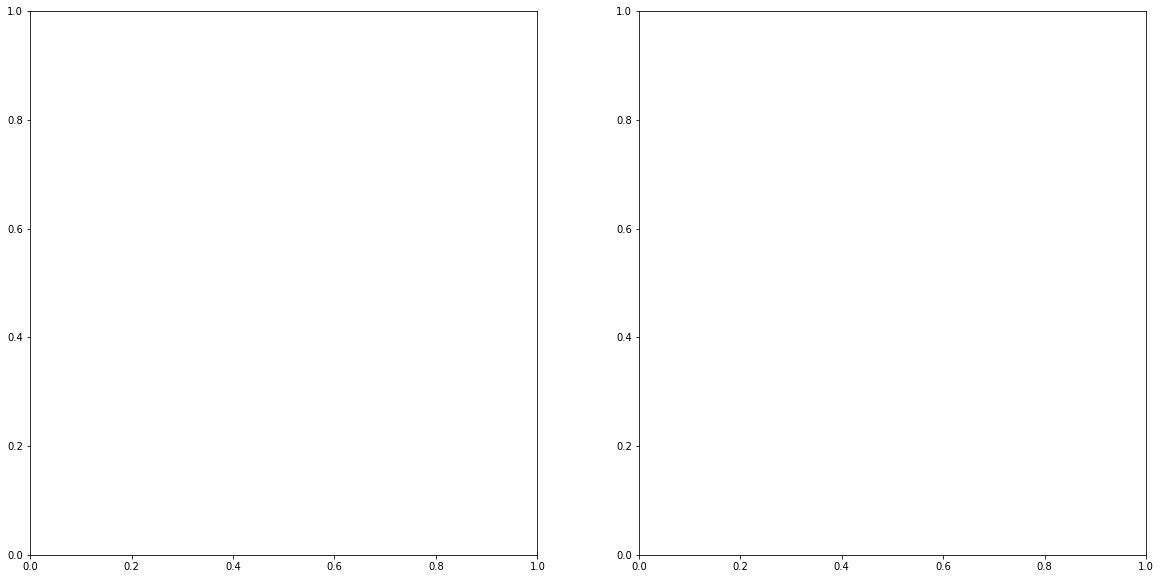

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

ax1.plot(x=lstat_line, y=medv_line)
df.plot.scatter(x='MEDV', y='LSTAT', ax=axs[0])

#axs[1].plot(x_line, y_line, color='red')
#df.plot.scatter(x='MEDV', y='LSTAT', ax=axs[0])



In [ ]:
# Plot MEDV and LSTAT
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)


ax2 = fig.add_subplot(122)

#df.plot.scatter(x='MEDV', y='LSTAT', ax=ax1)
ax1.plot(x=x_line, y=y_line)

df.plot.scatter(x='LSTAT', y='MEDV', ax=ax2)



In [ ]:
medv_line.size